In [2]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import gmean
from sklearn.metrics import adjusted_rand_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

In [1]:
# Crisp and fuzzy metrics


def modified_partition_coefficient(U):
    U = U.to_numpy()
    n,c = U.shape
    PC = ((U**2).sum())/n
    return 1 - (c/(c-1))*(1-PC)

def partition_entropy_coefficient(U):
    U = U.to_numpy()
    n = U.shape[0]
    M = -(U * np.log(U))
    M = np.where(np.isnan(M),0,M)
    return M.sum()/n
    
def fuzzy_to_crisp(U):
    return U.to_numpy().argmax(axis = 1)

def F_measure(x_true,x_pred):
    x = confusion_matrix(x_true,x_pred)
    c,K = x.shape
    n = x.sum()
    n_true = x.sum(axis = 1)
    n_pred = x.sum(axis = 0)
    F_score = np.zeros((c,K))
    for i in range(c):
        for j in range(K):
            F_score[i,j] = (2*x[i,j])/(n_true[i] + n_pred[j])
    return ( (F_score.max(axis = 1) * n_true).sum() )/n


def OERC(y_true, y_pred):
    D = confusion_matrix(y_true, y_pred)
    n = D.sum()
    S = D.max(axis = 0)
    return (1 - (S.sum())/n)

    



In [3]:
x = pd.read_csv('yeast.csv')
labels = np.unique(x['class'],return_inverse = True)[1]
yeast = x.drop('class', axis = 1)
labels

array([6, 6, 6, ..., 4, 7, 0])

## Analisando o banco de dados

In [ ]:
yeast.dtypes

In [4]:
yeast.describe(percentiles=[0.5])

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [75]:
yeast.corr()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
mcg,1.000000,0.581631,-0.163951,0.158175,0.064922,0.005597,0.075043,-0.124540
gvh,0.581631,1.000000,-0.271800,0.140314,0.060823,0.000392,0.088759,-0.102984
alm,-0.163951,-0.271800,1.000000,0.059668,-0.008083,0.009378,-0.185805,-0.022043
mit,0.158175,0.140314,0.059668,1.000000,-0.005931,-0.009040,-0.103591,-0.054797
erl,0.064922,0.060823,-0.008083,-0.005931,1.000000,-0.009674,0.043627,0.002829
pox,0.005597,0.000392,0.009378,-0.009040,-0.009674,1.000000,0.020900,-0.035659
vac,0.075043,0.088759,-0.185805,-0.103591,0.043627,0.020900,1.000000,0.089690
nuc,-0.124540,-0.102984,-0.022043,-0.054797,0.002829,-0.035659,0.089690,1.000000


Text(0.5, 1.0, 'Mapa de correlação')

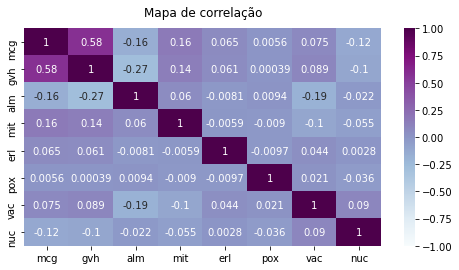

In [76]:
plt.figure(figsize=(8,4)) 
heatmap = sns.heatmap(yeast.corr(), vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_title('Mapa de correlação', fontdict={'fontsize':12}, pad=12)

In [77]:
labels = np.unique(labels,return_inverse=True)[1]
pd.Series(labels).value_counts()

0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
dtype: int64

## Resultados para m = 1.0001

In [4]:
rs = pd.read_csv('Resultados/application1/j/J(1.0001).csv', names = ['J'])
idm = rs.idxmin()
rs.iloc[idm] # Melhor resultado da função objetivo

,J
3,0.771639


In [5]:
colnames = ['C1', 'C2', 'C3','C4','C5','C6','C7','C8','C9','C10']

G = pd.read_csv('Resultados/application1/prototype/G3(1.0001).csv')
U = pd.read_csv('Resultados/application1/degree/U3(1.0001).csv')
W = pd.read_csv('Resultados/application1/weight/W3(1.0001).csv')
W.index = colnames
G.index = colnames

In [82]:
round(G,3) # Protótipos m = 1.0001

,mcg,gvh,alm,mit,erl,pox,vac,nuc
C1,0.487,0.471,0.404,0.216,0.500,0.000,0.510,0.271
C2,0.591,0.577,0.493,0.253,1.000,0.000,0.526,0.279
C3,0.500,0.500,0.501,0.260,0.506,0.008,0.500,0.277
C4,0.508,0.503,0.539,0.321,0.500,0.000,0.478,0.244
C5,0.486,0.489,0.525,0.276,0.500,0.000,0.464,0.463
C6,0.519,0.663,0.437,0.297,0.500,0.000,0.506,0.252
C7,0.422,0.432,0.545,0.197,0.500,0.000,0.500,0.293
C8,0.499,0.499,0.500,0.261,0.500,0.008,0.500,0.276
C9,0.526,0.530,0.515,0.518,0.500,0.000,0.503,0.246
C10,0.681,0.643,0.471,0.229,0.500,0.000,0.511,0.240


In [85]:
modified_partition_coefficient(U)

1.0

In [86]:
partition_entropy_coefficient(U)

<ipython-input-2-e818624cc3f0>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-input-2-e818624cc3f0>:13: RuntimeWarning: invalid value encountered in multiply
  M = -(U * np.log(U))


0.0

In [6]:
crisp = fuzzy_to_crisp(U)
np.unique(crisp,return_counts=True)

(array([1, 7]), array([  14, 1470]))

In [94]:
adjusted_rand_score(labels, crisp)

0.002979506538380728

In [89]:
F_measure(x_true = labels, x_pred = crisp)

0.35449774877105383

In [7]:
OERC(labels,crisp)

0.6873315363881402

In [92]:
CM = confusion_matrix(labels, crisp, labels=[0,1,2,3,4,5,6,7,8,9])
pd.DataFrame(CM)
CM.sum(axis = 1)

array([463,   5,  35,  44,  51, 163, 244, 429,  20,  30])

 ## Resultados para m = 1.1

In [8]:
rs1 = pd.read_csv('Resultados/application1/j/J(1.1).csv', names = ['J'])
idm = rs1.idxmin()
rs1.iloc[idm] # Melhor resultado da função objetivo

,J
45,2.647620e-11


In [9]:
colnames = ['C1', 'C2', 'C3','C4','C5','C6','C7','C8','C9','C10']

G1 = pd.read_csv('Resultados/application1/prototype/G45(1.1).csv')
U1 = pd.read_csv('Resultados/application1/degree/U45(1.1).csv')
W1 = pd.read_csv('Resultados/application1/weight/W45(1.1).csv')
W1.index = colnames
G1.index = colnames

In [50]:
#prototypes
G1
np.round(G1,3)

,mcg,gvh,alm,mit,erl,pox,vac,nuc
C1,0.591,0.577,0.493,0.253,1.0,0.000,0.526,0.279
C2,0.456,0.425,0.499,0.439,0.5,0.517,0.503,0.261
C3,0.630,0.570,0.500,0.480,0.5,0.000,0.510,0.220
C4,0.499,0.499,0.500,0.261,0.5,0.000,0.500,0.277
C5,0.506,0.529,0.478,0.501,0.5,0.000,0.510,0.220
C6,0.502,0.497,0.511,0.253,0.5,0.742,0.509,0.237
C7,0.451,0.404,0.530,0.205,0.5,0.000,0.487,0.255
C8,0.370,0.530,0.600,0.190,0.5,0.500,0.420,0.220
C9,0.510,0.480,0.510,0.260,0.5,0.000,0.510,0.270
C10,0.602,0.469,0.443,0.266,1.0,0.000,0.522,0.311


In [51]:
modified_partition_coefficient(U1)

1.0

In [52]:
partition_entropy_coefficient(U1)

<ipython-input-2-e818624cc3f0>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-input-2-e818624cc3f0>:13: RuntimeWarning: invalid value encountered in multiply
  M = -(U * np.log(U))


1.9708792695140537e-23

In [10]:
crisp1 = fuzzy_to_crisp(U1)
np.unique(crisp1,return_counts=True)

(array([0, 2, 3, 5, 7]), array([  14,    1, 1454,   14,    1]))

In [54]:
adjusted_rand_score(labels, crisp1)

0.011828318061781177

In [21]:
F_measure(x_true = labels, x_pred = crisp1)

0.36402191184369137

In [11]:
OERC(labels,crisp1)

0.6799191374663073

In [25]:
CM = confusion_matrix(labels, crisp1, labels=[0,1,2,3,4,5,6,7,8,9])
pd.DataFrame(CM)
CM.sum(axis = 1)

array([463,   5,  35,  44,  51, 163, 244, 429,  20,  30])

### Resultados para m = 1.6

In [12]:
rs2 = pd.read_csv('Resultados/application1/j/J(1.6).csv', names = ['J'])
idm2 = rs2.idxmin()
rs2.iloc[idm2] # Melhor resultado da função objetivo

,J
45,2.638794e-13


In [13]:
colnames = ['C1', 'C2', 'C3','C4','C5','C6','C7','C8','C9','C10']

G2 = pd.read_csv('Resultados/application1/prototype/G45(1.6).csv')
U2 = pd.read_csv('Resultados/application1/degree/U45(1.6).csv')
W2 = pd.read_csv('Resultados/application1/weight/W45(1.6).csv')
W2.index = colnames
G2.index = colnames

In [58]:
G2
np.round(G2,3)


,mcg,gvh,alm,mit,erl,pox,vac,nuc
C1,0.591,0.577,0.493,0.253,1.0,0.000,0.526,0.279
C2,0.511,0.494,0.505,0.258,0.5,0.759,0.515,0.239
C3,0.496,0.445,0.531,0.252,0.5,0.503,0.498,0.223
C4,0.330,0.211,0.530,0.150,1.0,0.000,0.520,0.499
C5,0.594,0.585,0.478,0.460,0.5,0.000,0.516,0.223
C6,0.505,0.410,0.554,0.185,0.5,0.514,0.492,0.221
C7,0.499,0.499,0.500,0.261,0.5,0.000,0.500,0.277
C8,0.370,0.530,0.600,0.190,0.5,0.500,0.420,0.220
C9,0.557,0.548,0.487,0.283,0.5,0.000,0.504,0.246
C10,0.400,0.417,0.493,0.145,1.0,0.000,0.538,0.335


In [60]:
modified_partition_coefficient(U2)

0.9999582981576908

In [61]:
partition_entropy_coefficient(U2)

0.00016220530495743903

In [14]:
crisp2 = fuzzy_to_crisp(U2)
np.unique(crisp2,return_counts=True)

(array([0, 1, 3, 6, 7]), array([  13,   14,    1, 1455,    1]))

In [63]:
adjusted_rand_score(labels, crisp2)

0.011617590277508132

In [32]:
F_measure(x_true = labels, x_pred = crisp2)

0.36412189193351574

In [15]:
OERC(labels,crisp2)

0.6799191374663073

In [35]:
CM2 = confusion_matrix(labels, crisp2, labels=[0,1,2,3,4,5,6,7,8,9])
pd.DataFrame(CM2)
CM2.sum(axis =0)

array([  13,   14,    0,    1,    0,    0, 1455,    1,    0,    0])

### Resultado para m = 2.0

In [16]:
rs3 = pd.read_csv('Resultados/application1/j/J(2.0).csv', names = ['J'])
idm3 = rs3.idxmin()
rs3.iloc[idm3] # Melhor resultado da função objetivo

,J
86,2.917565e-13


In [17]:
colnames = ['C1', 'C2', 'C3','C4','C5','C6','C7','C8','C9','C10']

G3 = pd.read_csv('Resultados/application1/prototype/G86(2.0).csv')
U3 = pd.read_csv('Resultados/application1/degree/U86(2.0).csv')
W3 = pd.read_csv('Resultados/application1/weight/W86(2.0).csv')
W3.index = colnames
G3.index = colnames

In [67]:
G3
round(G3,3)


,mcg,gvh,alm,mit,erl,pox,vac,nuc
C1,0.680,0.581,0.510,0.186,0.500,0.830,0.539,0.220
C2,0.448,0.416,0.489,0.147,1.000,0.000,0.526,0.301
C3,0.499,0.499,0.500,0.261,0.500,0.000,0.500,0.277
C4,0.442,0.427,0.491,0.163,1.000,0.000,0.527,0.314
C5,0.370,0.530,0.600,0.190,0.500,0.500,0.420,0.220
C6,0.515,0.501,0.492,0.234,0.500,0.757,0.510,0.300
C7,0.591,0.577,0.493,0.253,1.000,0.000,0.526,0.279
C8,0.663,0.596,0.509,0.139,0.500,0.830,0.522,0.223
C9,0.491,0.484,0.506,0.267,0.500,0.748,0.512,0.241
C10,0.444,0.428,0.492,0.163,0.999,0.000,0.527,0.313


In [69]:
modified_partition_coefficient(U3)

0.9995544128113535

In [70]:
partition_entropy_coefficient(U3)

0.0007711099514318296

In [18]:
crisp3 = fuzzy_to_crisp(U3)
np.unique(crisp3,return_counts=True)

(array([0, 2, 4, 6, 8]), array([   1, 1455,    1,   14,   13]))

In [72]:
adjusted_rand_score(labels, crisp3)

0.011600759196164507

In [73]:
F_measure(x_true = labels, x_pred = crisp3)

0.36344681524640565

In [19]:
OERC(labels,crisp3)

0.6805929919137466

In [47]:
CM3 = confusion_matrix(labels, crisp3, labels=[0,1,2,3,4,5,6,7,8,9])
pd.DataFrame(CM3)
CM3.sum(axis=0)

array([   1,    0, 1455,    0,    1,    0,   14,    0,   13,    0])

## Análise de todas as iterações 

In [20]:
colnames = ['C1', 'C2', 'C3','C4','C5','C6','C7','C8','C9','C10']
mpc = pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
pec = pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
ari = pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
fm = pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
cer = pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
j =  pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
t =  pd.DataFrame(np.zeros((100,4)), columns=['m = 1.0001','m = 1.1','m = 1.6', 'm = 2.0'])
M = [1.0001,1.1, 1.6, 2.0]
for m in M:
    jm = pd.read_csv('Resultados/application1/j/J(' + str(m) + ').csv', names = ['J'])
    tm = pd.read_csv('Resultados/application1/t/T' + '(' + str(m) + ').csv', names = ['T'])
    j['m = ' + str(m)] = jm
    t['m = ' + str(m)] = tm

    for i in range(100):
        Uname = 'Resultados/application1/degree/U' + str(i) + '(' + str(m) + ').csv'
        U = pd.read_csv(Uname)
        mpc.loc[i,'m = ' + str(m)] = modified_partition_coefficient(U)
        pec.loc[i,'m = ' + str(m)] = partition_entropy_coefficient(U)
        crisp = fuzzy_to_crisp(U)
        ari.loc[i,'m = ' + str(m)] = adjusted_rand_score(labels,crisp)
        fm.loc[i,'m = ' + str(m)] = F_measure(labels,crisp)
        cer.loc[i,'m = ' + str(m)] = OERC(labels,crisp)




<ipython-input-1-68b283386728>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: invalid value encountered in multiply
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: invalid value encountered in multiply
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: invalid value encountered in multiply
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: invalid value encountered in multiply
  M = -(U * np.log(U))
<ipython-input-1-68b283386728>:13: RuntimeWarning: divide by zero encountered in log
  M = -(U * np.log(U))
<ipython-inp

#### Modified Partition Coefficient

In [21]:
mpc.describe(percentiles=[0.5])

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
count,1.000000e+02,100.000000,100.000000,100.000000
mean,9.999999e-01,0.992000,0.934797,0.900025
std,6.380026e-07,0.017131,0.130904,0.162787
min,9.999957e-01,0.927263,0.493110,0.371550
50%,1.000000e+00,0.999995,0.997440,0.991815
max,1.000000e+00,1.000000,1.000000,0.999957


In [22]:
mcp1 = mpc.iloc[:,0].to_numpy()
mcp2 = mpc.iloc[:,1].to_numpy()
mcp3 = mpc.iloc[:,2].to_numpy()
mcp4 = mpc.iloc[:,3].to_numpy()
friedmanchisquare(mcp1, mcp2, mcp3, mcp4)

FriedmanchisquareResult(statistic=186.0482897384306, pvalue=4.357083447710202e-40)

In [33]:
posthoc_nemenyi_friedman(mpc)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
m = 1.0001,1.000,0.001,0.001000,0.001000
m = 1.1,0.001,1.000,0.001000,0.001000
m = 1.6,0.001,0.001,1.000000,0.141637
m = 2.0,0.001,0.001,0.141637,1.000000


#### Partition Entropy Coefficient
 

In [102]:
pec.describe(percentiles=[0.5])

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
count,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,5.176855e-07,1.206835e-02,9.943262e-02,0.163158
std,2.057529e-06,2.576309e-02,1.896098e-01,0.247901
min,0.000000e+00,5.764894e-57,1.927526e-08,0.000179
50%,6.934545e-14,1.583244e-05,4.179736e-03,0.023989
max,1.330245e-05,1.072814e-01,7.650284e-01,0.995379


In [117]:
pec1 = pec.iloc[:,0].to_numpy()
pec2 = pec.iloc[:,1].to_numpy()
pec3 = pec.iloc[:,2].to_numpy()
pec4 = pec.iloc[:,3].to_numpy()
friedmanchisquare(pec1, pec2, pec3, pec4)

FriedmanchisquareResult(statistic=187.164, pvalue=2.501537941281148e-40)

In [118]:
posthoc_nemenyi_friedman(pec)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
m = 1.0001,1.000,0.001,0.001000,0.001000
m = 1.1,0.001,1.000,0.001000,0.001000
m = 1.6,0.001,0.001,1.000000,0.065622
m = 2.0,0.001,0.001,0.065622,1.000000


#### Adjusted Rand Index

In [104]:
round(ari.describe(percentiles=[0.5]),4)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
count,100.0000,100.0000,100.0000,100.0000
mean,0.1675,0.0173,0.0175,0.0132
std,0.0205,0.0259,0.0232,0.0123
min,0.0030,-0.0148,-0.0114,-0.0090
50%,0.1675,0.0113,0.0116,0.0116
max,0.2174,0.1398,0.1003,0.1043


In [111]:
ari1 = ari.iloc[:,0].to_numpy()
ari2 = ari.iloc[:,1].to_numpy()
ari3 = ari.iloc[:,2].to_numpy()
ari4 = ari.iloc[:,3].to_numpy()
friedmanchisquare(ari1, ari2, ari3, ari4)

FriedmanchisquareResult(statistic=181.24044265593562, pvalue=4.759729338719181e-39)

In [119]:
posthoc_nemenyi_friedman(ari)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
m = 1.0001,1.000,0.001000,0.001000,0.001000
m = 1.1,0.001,1.000000,0.839364,0.125527
m = 1.6,0.001,0.839364,1.000000,0.501181
m = 2.0,0.001,0.125527,0.501181,1.000000


#### F-measure

In [105]:
round(fm.describe(percentiles=[0.5]),4)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
count,100.0000,100.0000,100.0000,100.0000
mean,0.4546,0.3691,0.3662,0.3646
std,0.0204,0.0201,0.0117,0.0086
min,0.3545,0.3376,0.3471,0.3466
50%,0.4551,0.3638,0.3640,0.3640
max,0.5134,0.4606,0.4088,0.4214


In [113]:
fm1 = fm.iloc[:,0].to_numpy()
fm2 = fm.iloc[:,1].to_numpy()
fm3 = fm.iloc[:,2].to_numpy()
fm4 = fm.iloc[:,3].to_numpy()
friedmanchisquare(fm1, fm2, fm3, fm4)

FriedmanchisquareResult(statistic=172.9587525150906, pvalue=2.9233780097175817e-37)

In [120]:
posthoc_nemenyi_friedman(fm)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
m = 1.0001,1.000,0.001,0.001000,0.001000
m = 1.1,0.001,1.000,0.900000,0.900000
m = 1.6,0.001,0.900,1.000000,0.624158
m = 2.0,0.001,0.900,0.624158,1.000000


#### Classification Error Rate

In [23]:
round(cer.describe(percentiles=[0.5]),4)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
count,100.0000,100.0000,100.0000,100.0000
mean,0.4635,0.6659,0.6749,0.6785
std,0.0237,0.0255,0.0125,0.0087
min,0.4441,0.5627,0.6287,0.6247
50%,0.4613,0.6779,0.6799,0.6806
max,0.6873,0.6853,0.6867,0.6873


In [24]:
cer1 = cer.iloc[:,0].to_numpy()
cer2 = cer.iloc[:,1].to_numpy()
cer3 = cer.iloc[:,2].to_numpy()
cer4 = cer.iloc[:,3].to_numpy()

friedmanchisquare(cer1, cer2, cer3, cer4)

FriedmanchisquareResult(statistic=199.80873180873195, pvalue=4.639700289670436e-43)

In [25]:
posthoc_nemenyi_friedman(cer)

,m = 1.0001,m = 1.1,m = 1.6,m = 2.0
m = 1.0001,1.000,0.001000,0.001000,0.001000
m = 1.1,0.001,1.000000,0.244488,0.001000
m = 1.6,0.001,0.244488,1.000000,0.056977
m = 2.0,0.001,0.001000,0.056977,1.000000
